## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_study_data = pd.merge(mouse_metadata,study_results, on="Mouse ID")
combined_study_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice in the DataFrame.
Total_Mouse = combined_study_data["Mouse ID"].count()
Total_Mouse

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
Duplicates_Mouse = combined_study_data[combined_study_data.duplicated(["Mouse ID","Timepoint"])]
Duplicates_Mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
All_Duplicates = combined_study_data[combined_study_data.duplicated(["Mouse ID"])]
All_Duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean_DF = combined_study_data.drop_duplicates("Mouse ID")
Clean_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [6]:
# Checking the number of mice in the clean DataFrame.
Total_Mouse_WD = Clean_DF["Mouse ID"].count()
Total_Mouse_WD

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.
# Calculations
mean = combined_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = combined_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = combined_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std = combined_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem = combined_study_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
# Create DF
Summary_Statistics = pd.DataFrame({"Mean": mean,
                                   "Median" : median,
                                   "Variance" : variance,
                                   "Standard Deviation" : std,
                                   "SEM" : sem})
Summary_Statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Summary_Statistics

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

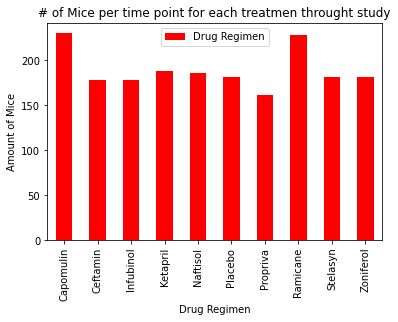

In [9]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 
# I didn't understand the instruction per time point?
# I saw on slack that people were doing for each treatment.
Drug = combined_study_data.groupby('Drug Regimen')

# Create DataFrame
Drug_DF = pd.DataFrame(Drug['Drug Regimen'].count())

# Create Bar Chart
Drug_Chart = Drug_DF.plot(kind='bar',title = "# of Mice per time point for each treatmen throught study", color="red")
Drug_Chart.set_xlabel("Drug Regimen")
Drug_Chart.set_ylabel("Amount of Mice")
plt.show()

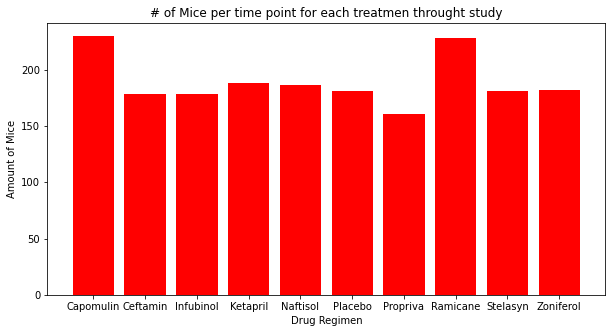

In [10]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
# List for X_Axis
list_drugs = Summary_Statistics.index.tolist()
# Amount per drug
amount_drug = (combined_study_data.groupby(['Drug Regimen'])["Age_months"].count()).tolist()
# Define X_Axis
x_axis = np.arange(len(amount_drug))
x_axis = list_drugs
# Creating bar chart
plt.figure(figsize=(10,5))
plt.bar(x_axis, amount_drug, color='r')
plt.title('# of Mice per time point for each treatmen throught study')
plt.xlabel('Drug Regimen')
plt.ylabel('Amount of Mice')
plt.show()

## Pie Plots

<Figure size 720x360 with 0 Axes>

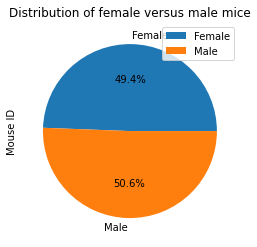

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Creating a DataFrame
mice_by_gender = pd.DataFrame(combined_study_data.groupby(['Sex']).count()).reset_index()
# Clean the DataDrame
mice_by_gender = mice_by_gender[['Sex','Mouse ID']]
# Creating the Pie Chart
plt.figure(figsize=(10,5))
mice_by_gender.plot(kind='pie',y = 'Mouse ID', autopct='%1.1f%%', labels = mice_by_gender['Sex'])
plt.title("Distribution of female versus male mice")
plt.show()

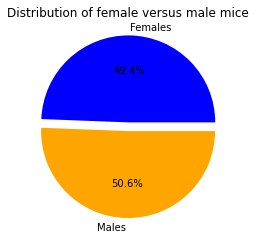

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Calculate Amount per Gender
gender_amount = (combined_study_data.groupby(['Sex'])['Age_months'].count()).tolist()
# Creating the Pie Chart
plt.pie(gender_amount, explode=(0.1,0), labels = ('Females','Males'),autopct='%1.1f%%', colors = ['blue','orange'])
plt.title("Distribution of female versus male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
# The 4 most promising (Capomulin, Ramicane, Ketapril, Zoniferol) as of my bar charts.
# Filter by Time point = 45
CSD = combined_study_data.loc[combined_study_data['Timepoint'] == 45]
# Sort Data by Druge Regimen
CSD_Sorted = CSD.sort_values(['Drug Regimen'], ascending=True)
CSD_Sorted.head().reset_index()


,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,390,r944,Capomulin,Male,12,25,45,41.581521,2
1,440,i557,Capomulin,Female,1,24,45,47.685963,1
2,380,l509,Capomulin,Male,17,21,45,41.483008,3
3,370,s710,Capomulin,Female,1,23,45,40.728578,1
4,360,g316,Capomulin,Female,22,22,45,40.159220,2


In [14]:
# Get Capomulin data
Capomulin = CSD_Sorted[CSD_Sorted['Drug Regimen'].isin(['Capomulin'])]
Capomulin.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,390,r944,Capomulin,Male,12,25,45,41.581521,2
1,440,i557,Capomulin,Female,1,24,45,47.685963,1
2,380,l509,Capomulin,Male,17,21,45,41.483008,3
3,370,s710,Capomulin,Female,1,23,45,40.728578,1
4,360,g316,Capomulin,Female,22,22,45,40.159220,2


In [15]:
# Create a column for 'Tumor Volume (mm3)'
Capomulin_column = Capomulin.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
Capomulin_column = Capomulin_column['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Capomulin_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The the median of Capomulin is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [16]:
# Get Ramicane data
Ramicane = CSD_Sorted[CSD_Sorted['Drug Regimen'].isin(['Ramicane'])]
Ramicane.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,400,e662,Ramicane,Male,8,24,45,40.659006,2
1,327,a411,Ramicane,Male,3,22,45,38.407618,1
2,49,g791,Ramicane,Male,11,16,45,29.128472,1
3,59,s508,Ramicane,Male,1,17,45,30.276232,0
4,74,m546,Ramicane,Male,18,16,45,30.564625,1


In [17]:
# Create a column for 'Tumor Volume (mm3)'
Ramicane_column = Ramicane.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
Ramicane_column = Ramicane_column['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ramicane_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ramicane is: 30.981175224999998
The upper quartile of Ramicane is: 38.508305307499995
The interquartile range of Ramicane is: 7.527130082499998
The the median of Ramicane is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [18]:
# Get Ketapril data
Ketapril = CSD_Sorted[CSD_Sorted['Drug Regimen'].isin(['Ketapril'])]
Ketapril.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1043,k382,Ketapril,Male,22,29,45,73.715619,4
1,735,c832,Ketapril,Male,18,29,45,65.415955,3
2,1193,m550,Ketapril,Male,18,28,45,69.253503,4
3,1203,m650,Ketapril,Male,15,27,45,73.901399,4
4,930,h246,Ketapril,Male,13,30,45,74.104086,2


In [19]:
# Create a column for 'Tumor Volume (mm3)'
Ketapril_column = Ketapril.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
Ketapril_column = Ketapril_column['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Ketapril_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Ketapril is: {lowerq}")
print(f"The upper quartile of Ketapril is: {upperq}")
print(f"The interquartile range of Ketapril is: {iqr}")
print(f"The the median of Ketapril is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Ketapril is: 67.12916566999999
The upper quartile of Ketapril is: 74.002742395
The interquartile range of Ketapril is: 6.873576725000007
The the median of Ketapril is: 69.87225079 
Values below 56.81880058249998 could be outliers.
Values above 84.31310748250002 could be outliers.


In [20]:
# Get Zoniferol data
Zoniferol = CSD_Sorted[CSD_Sorted['Drug Regimen'].isin(['Zoniferol'])]
Zoniferol.head().reset_index()

,index,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,1003,j365,Zoniferol,Male,24,28,45,64.294085,2
1,874,g296,Zoniferol,Female,14,29,45,68.163195,4
2,689,c559,Zoniferol,Female,19,28,45,61.840058,4
3,850,f545,Zoniferol,Female,20,26,45,73.324432,1
4,667,c302,Zoniferol,Female,10,29,45,64.575222,4


In [21]:
# Create a column for 'Tumor Volume (mm3)'
Zoniferol_column = Zoniferol.sort_values(['Tumor Volume (mm3)'], ascending = True).reset_index()
Zoniferol_column = Zoniferol_column['Tumor Volume (mm3)']
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
quartiles = Zoniferol_column.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq - lowerq

print(f"The lower quartile of Zoniferol is: {lowerq}")
print(f"The upper quartile of Zoniferol is: {upperq}")
print(f"The interquartile range of Zoniferol is: {iqr}")
print(f"The the median of Zoniferol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of Zoniferol is: 62.61814874
The upper quartile of Zoniferol is: 68.34176324
The interquartile range of Zoniferol is: 5.723614500000004
The the median of Zoniferol is: 65.68468877999999 
Values below 54.03272699 could be outliers.
Values above 76.92718499000001 could be outliers.


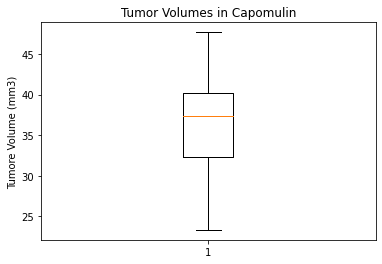

In [22]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Capomulin
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes in Capomulin')
ax1.set_ylabel('Tumore Volume (mm3)')
ax1.boxplot(Capomulin_column)
plt.show()

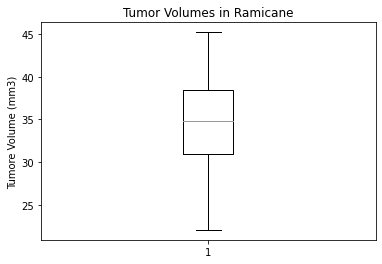

In [23]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Ramicane
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes in Ramicane')
ax1.set_ylabel('Tumore Volume (mm3)')
ax1.boxplot(Ramicane_column)
plt.show()

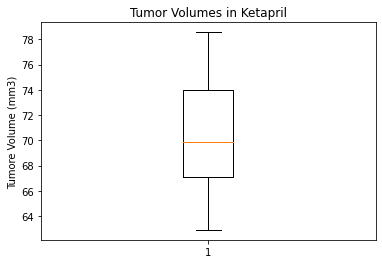

In [24]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Ketapril
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes in Ketapril')
ax1.set_ylabel('Tumore Volume (mm3)')
ax1.boxplot(Ketapril_column)
plt.show()

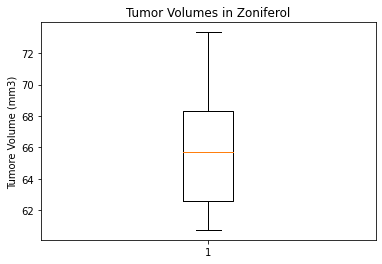

In [25]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Zoniferol
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volumes in Zoniferol')
ax1.set_ylabel('Tumore Volume (mm3)')
ax1.boxplot(Zoniferol_column)
plt.show()

## Line and Scatter Plots

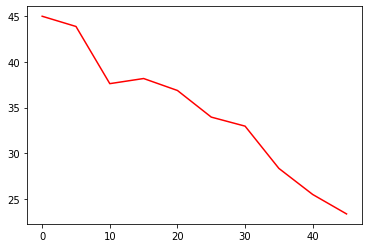

In [50]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Capomulin = combined_study_data.loc[combined_study_data['Drug Regimen'] == 'Capomulin']
Capomulin = Capomulin.reset_index()
# Select 1 Mouse
Mouse = Capomulin.loc[Capomulin['Mouse ID'] == 's185']
# Select 2 columns
Mouse = Mouse.loc[:,['Timepoint','Tumor Volume (mm3)']]
# Drop Index for Axis & set variables
x_axis = Mouse['Timepoint']
x_axis.reset_index(drop=True, inplace=True)
y_axis = Mouse['Tumor Volume (mm3)']
y_axis.reset_index(drop=True, inplace=True)
# Plot the line
plt.plot(x_axis,y_axis,color = 'red')
plt.show()

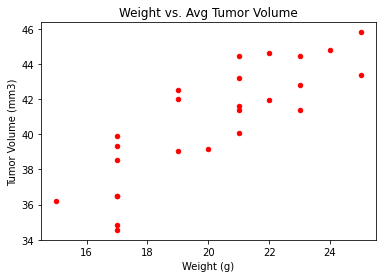

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Get data
weight = Capomulin.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
# Get the average tumor volume per mouse
avg_weight = pd.DataFrame(weight.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
# Plot Scatter
avg_weight.plot(kind="scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", title = 'Weight vs. Avg Tumor Volume',color = 'red')
set_ylabel = 'Avg Tumor Volume'
# Didn't know why y label didn't change
plt.show()

## Correlation and Regression

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
# Get data from past variables
mouse_weight = avg_weight.iloc[:,1]
avg_tumor_volume = avg_weight.iloc[:,2]
# Correlation
correlation = st.pearsonr(mouse_weight,avg_tumor_volume)
correlation

(0.8419363424694717, 1.322572243471279e-07)

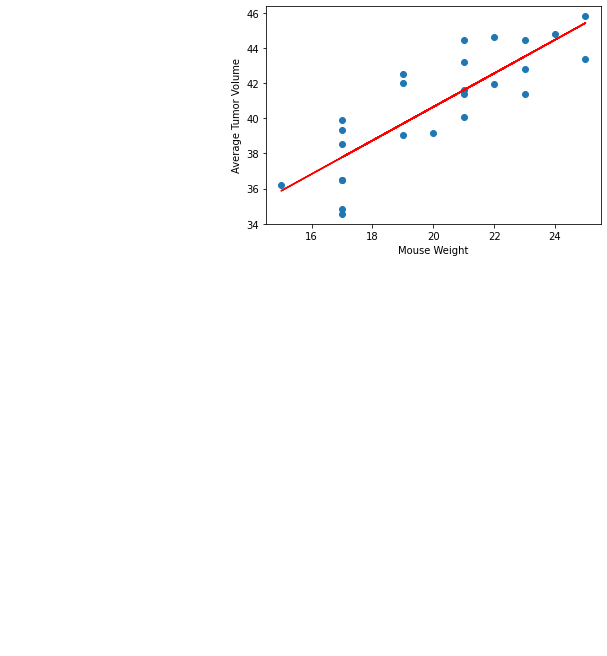

In [68]:
# linear regression model 
# Import linear regression model
from scipy.stats import linregress
# y = mx + b
# Define Variables
x = avg_weight['Weight (g)']
y = avg_weight['Tumor Volume (mm3)']
# Add linear equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plot scatter & line
plt.scatter(x, y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel("Mouse Weight")
plt.ylabel("Average Tumor Volume")
plt.show()